In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('results.csv')
df = df[df['classification'] != 'not possible']
df = df[df['classification'] != 'Not possible']
df = df[df['classification'] != 'Others']
df = df[df['classification'] != 'suicide']
# Remove rows where 'Category' contains "I cannot" or "I can't"
df = df[~df['classification'].str.contains(r"I cannot|I can't", case=False, na=False)]


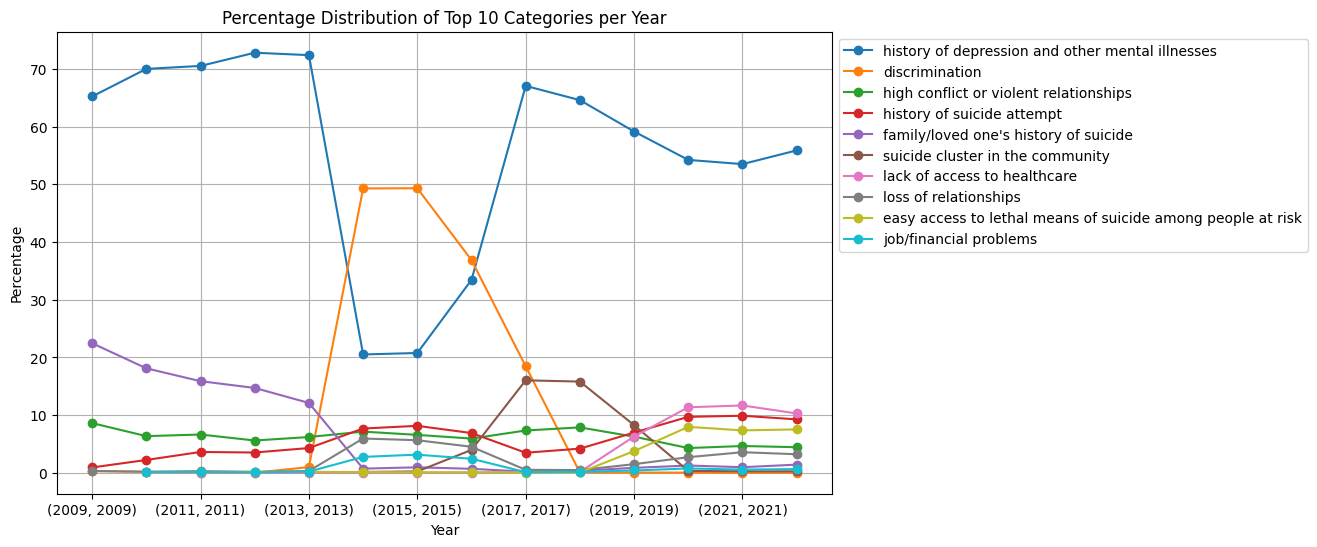

In [3]:
# Calculate the percentage distribution of each category per year
category_distribution = df.groupby(['year', 'classification']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack()
top_categories = df['classification'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 categories
filtered_distribution = category_distribution[top_categories]
filtered_distribution = filtered_distribution.interpolate()

filtered_distribution.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Percentage Distribution of Top 10 Categories per Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.grid(True)
plt.show()

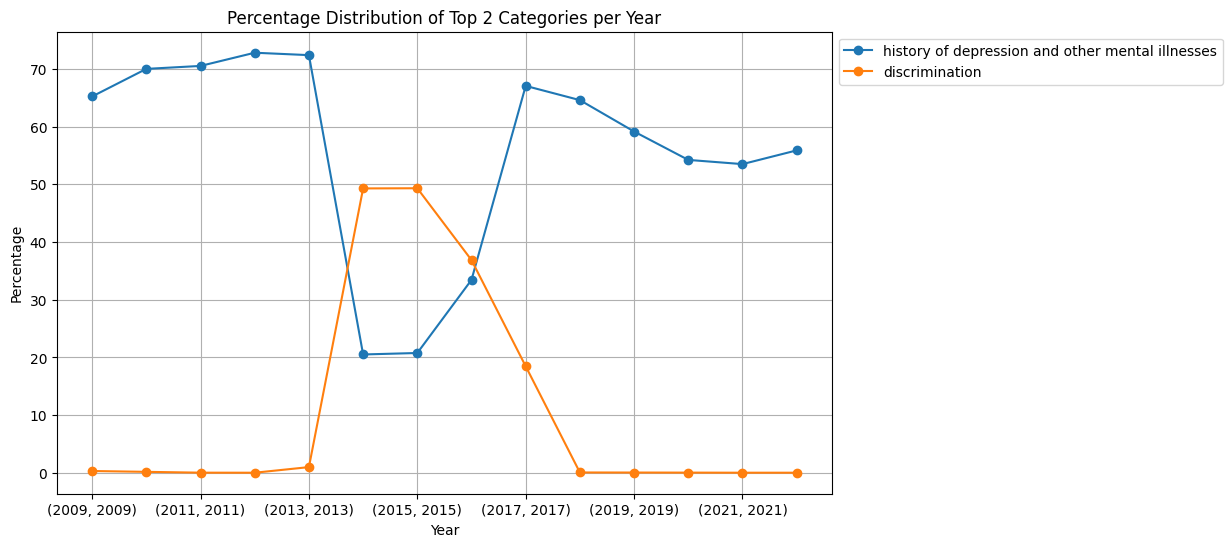

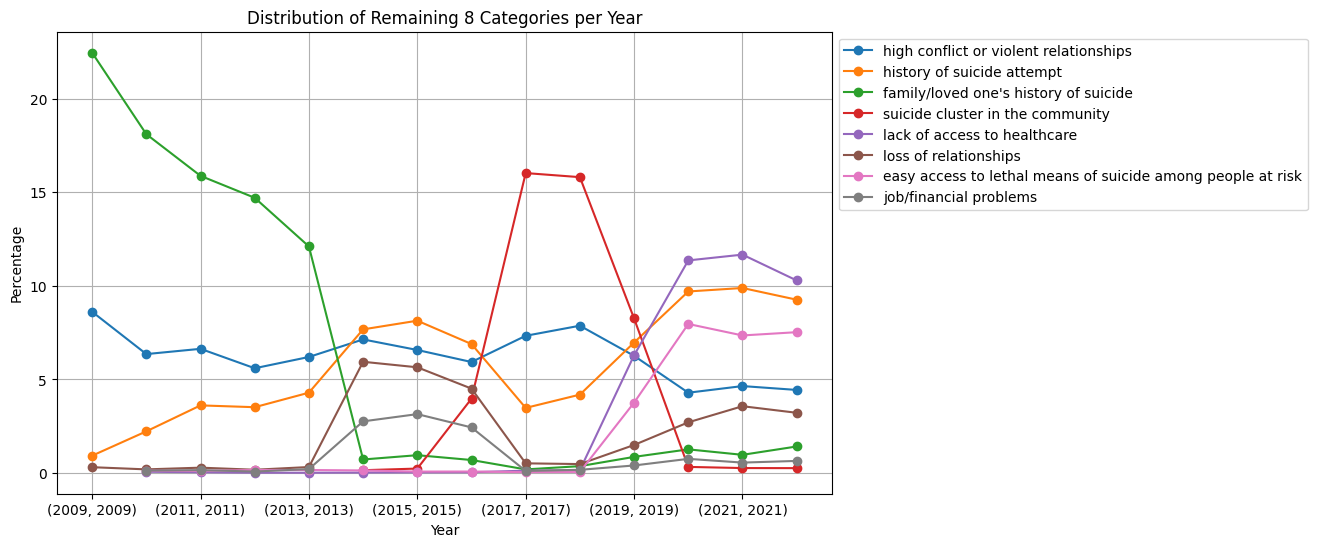

In [4]:
top_2_categories = top_categories[:2]
remaining_8_categories = top_categories[2:]

# Filter the data for top 2 and remaining 8 categories
top_2_distribution = filtered_distribution[top_2_categories]
remaining_8_distribution = filtered_distribution[remaining_8_categories]

top_2_distribution = top_2_distribution.interpolate()


plt.figure(figsize=(10, 6))
top_2_distribution.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Percentage Distribution of Top 2 Categories per Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
remaining_8_distribution.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Distribution of Remaining 8 Categories per Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

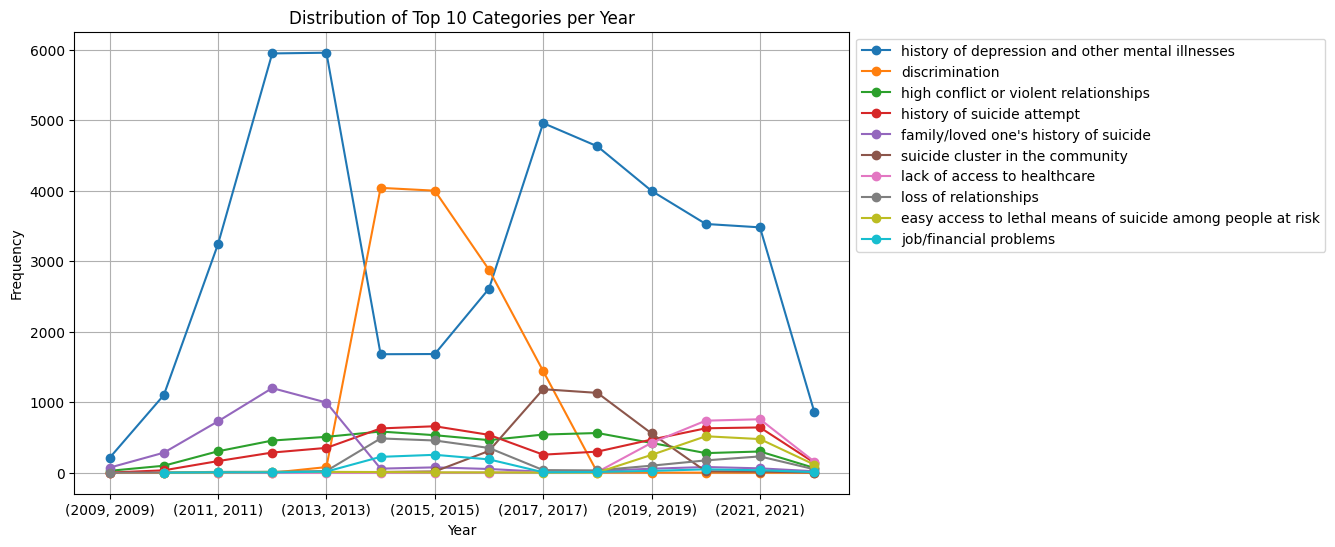

In [6]:
# Calculate the frequency distribution of each category per year
category_distribution = df.groupby(['year', 'classification']).size().groupby(level=0).apply(lambda x: x).unstack()
top_categories = df['classification'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 categories
filtered_distribution = category_distribution[top_categories]


filtered_distribution = filtered_distribution.interpolate()
filtered_distribution.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Distribution of Top 10 Categories per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.grid(True)
plt.show()

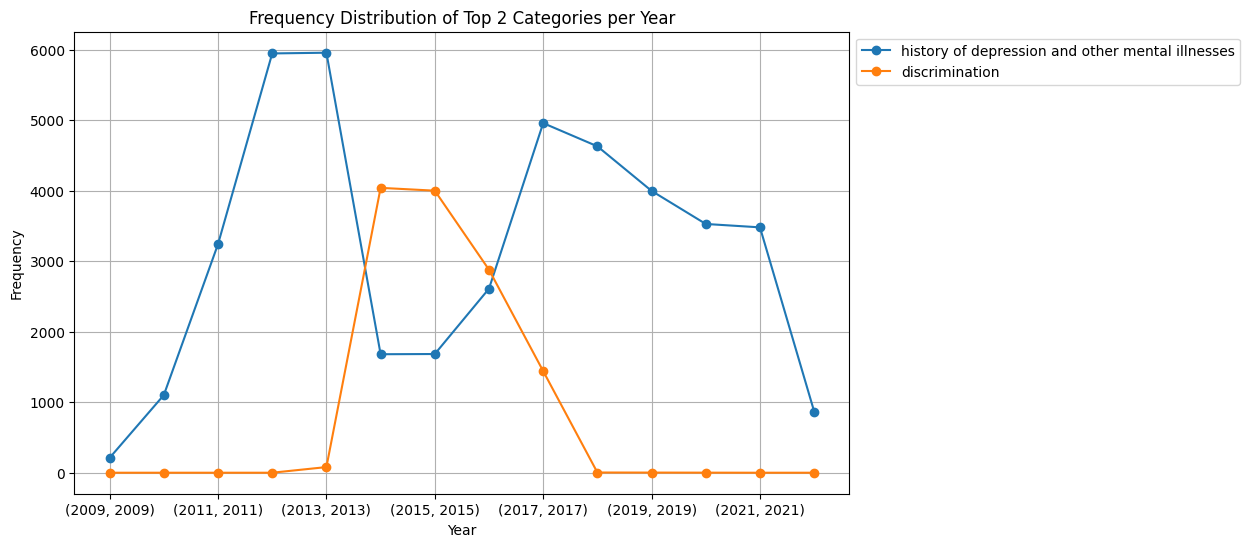

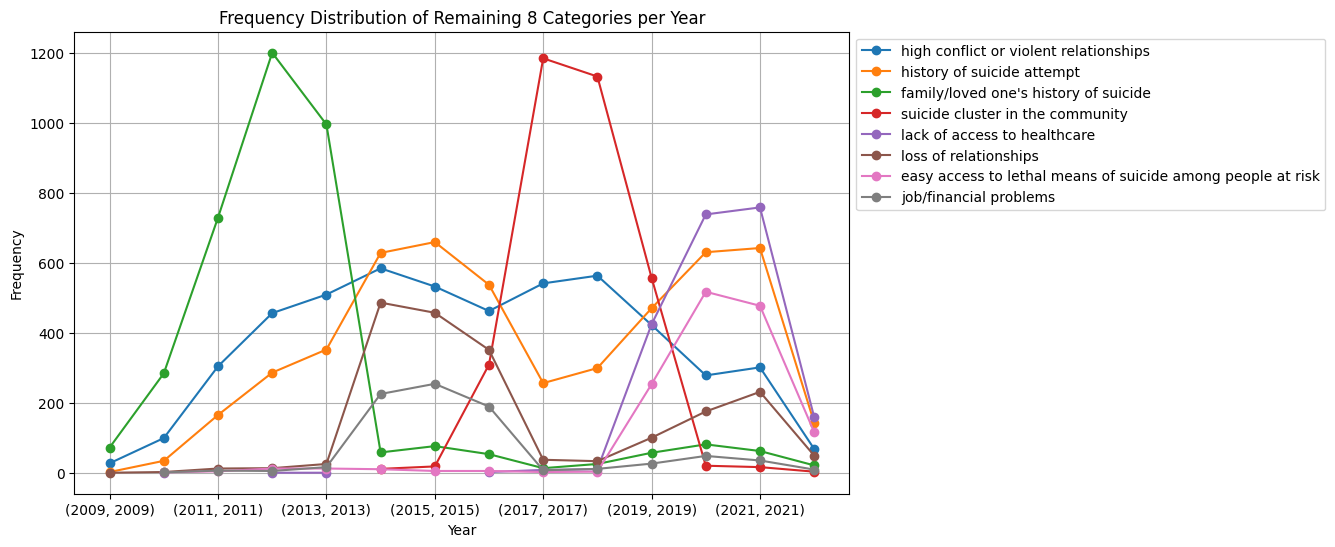

In [8]:
top_2_categories = top_categories[:2]
remaining_8_categories = top_categories[2:]

# Filter the data for top 2 and remaining 8 categories
top_2_distribution = filtered_distribution[top_2_categories]
remaining_8_distribution = filtered_distribution[remaining_8_categories]

top_2_distribution = top_2_distribution.interpolate()


plt.figure(figsize=(10, 6))
top_2_distribution.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Frequency Distribution of Top 2 Categories per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
remaining_8_distribution.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Frequency Distribution of Remaining 8 Categories per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

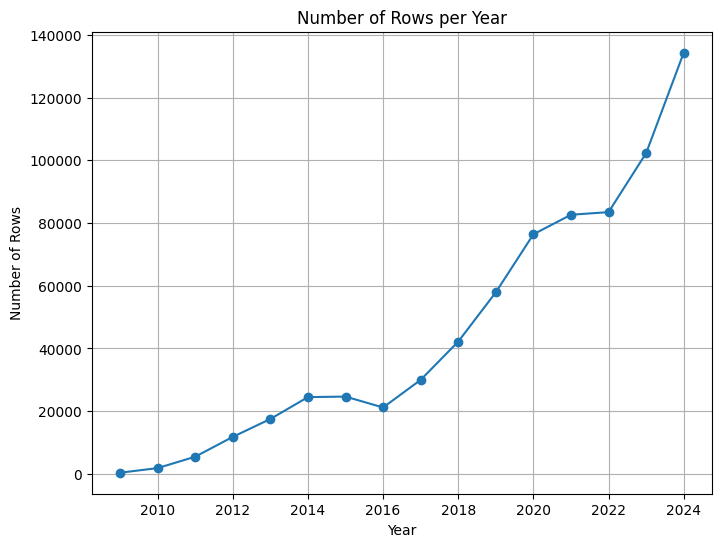

In [31]:
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Year')
plt.grid(True)
plt.show()